In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

Wine Quality Dataset - Every Wine in the market has its own characteristics and quality. Usually when purchasing a wine, I ask friends for recommendation or predict the quality by price. I am hoping to learn from this dataset about what features I can use to purchase a wine of good quality and at a reasonable price.
Also, this dataset is not in sklearn (sklearn has a different wine dataset which was built for test).

In [28]:
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets

wine_quality_df = pd.DataFrame(data=X, columns=X.columns)
wine_quality_df['quality'] = y
wine_quality_df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

Hypothesis:
1. The pH of a wine can influence its quality and taste.
2. Also pH of a wine is closely related to the acidity of the wine. Hence, i hope to find some correlations between these variables.
3. The variable 'residual sugar' would affect wine's quality as well. A sweeter wine is usually considered to have a better quality than a dry wine.

The dataset has numerical predictor variables that will help us predict the wine quality. Therefore, our target variable is "quality".

In [29]:
wine_quality_df.shape

(4898, 12)

In [30]:
wine_quality_df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

The summary stats tell us that mean quality of wine is 5.8 with a standard deviation of 0.8. This means that the dataset has usually mediocre quality wine. The max value is 9 which is the highest quality wine in our dataset and a min value of 3 being the lowest quality.


In [39]:
missing_values_count = wine_quality_df.isna().sum()
missing_values_count

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


We see no missing values in the columns which is good news!!

array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>,
        <Axes: title={'center': 'citric_acid'}>],
       [<Axes: title={'center': 'residual_sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>],
       [<Axes: title={'center': 'total_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

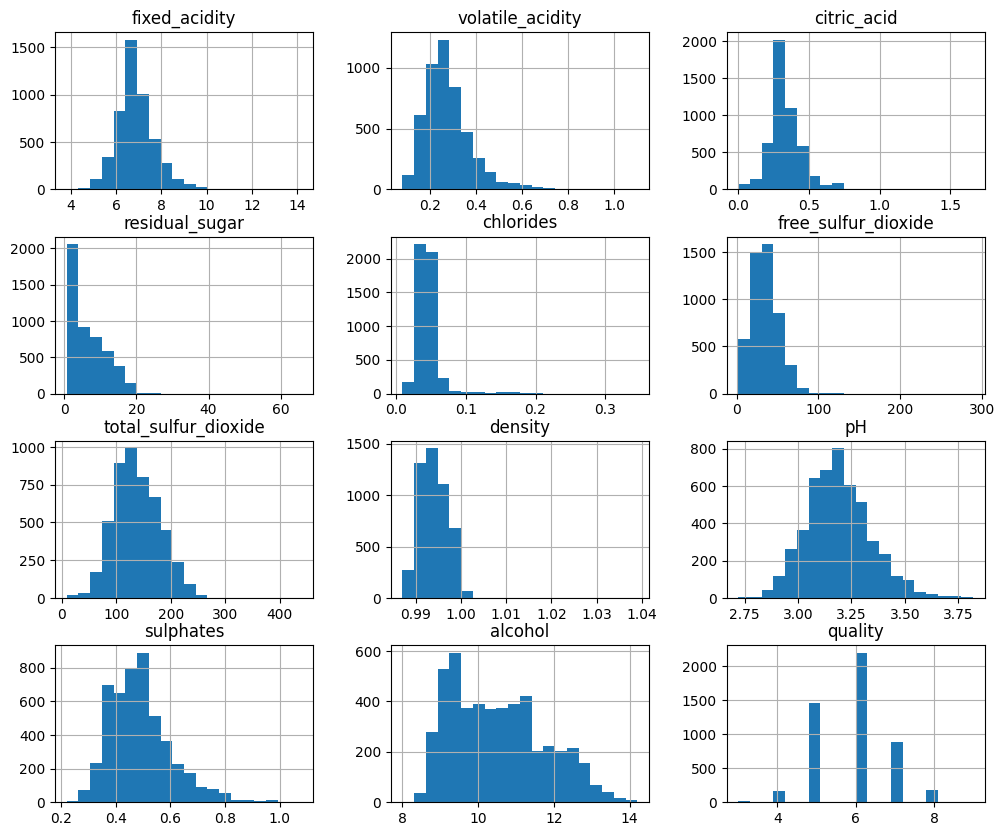

In [46]:
%matplotlib inline
wine_quality_df.hist(bins=20, figsize=(12, 10))


1. We see that fixed_acidity and pH values somewhat follow a normal distribution.
2. The alcohol variable is more spread out than other columns and thus has most variation.
3. The residual_sugar variable has a high frequency of lower values which may indicate that hypothesis earlier that sweeter wine is usually a higher quality wine.
4. The chlorides and density variables have the tighter distributions than other columns.


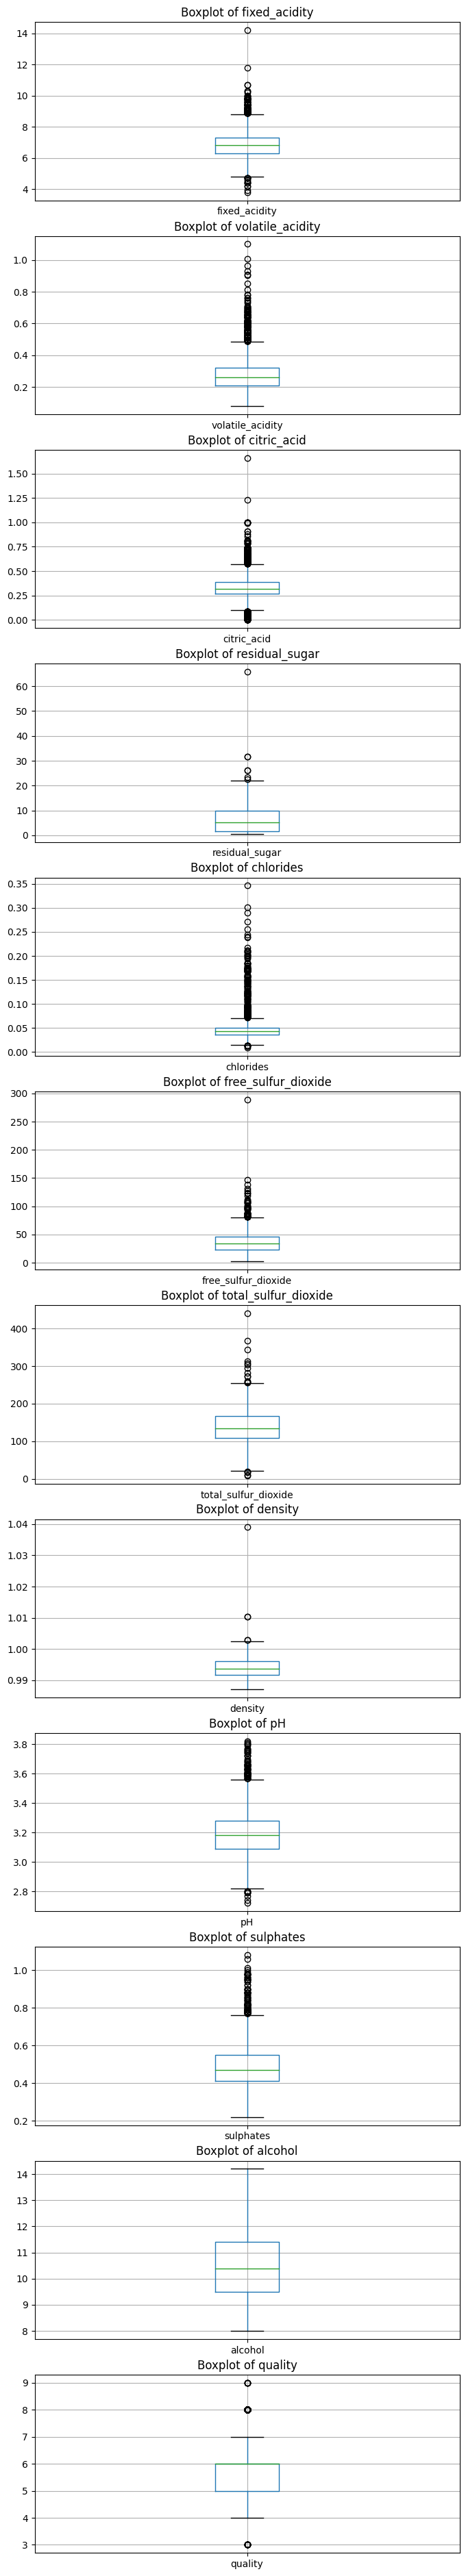

In [52]:
columns_list = wine_quality_df.columns
fig, axes = plt.subplots(nrows=len(columns_list), figsize=(8, 4 * len(columns_list)))

for i, column in enumerate(columns_list):

    wine_quality_df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")

1. We can confirm that alcohol variable has the most variation and chlorides and density with the lowest variations.
2. Chlorides variable has the longest upper tail indicating the presence of higher value outliers.
3. Volatile_acidity has a longer upper tail as well.
4. Alcohol variable consists of no outliers.
5. pH, sulfur_dioxide and fixed_acidity show presence of lower valued outliers forming the lower tail.
6. We also see presence of some outliers in our target variable quality.

We will remove Outliers and plot the boxplot again to confirm the removal.

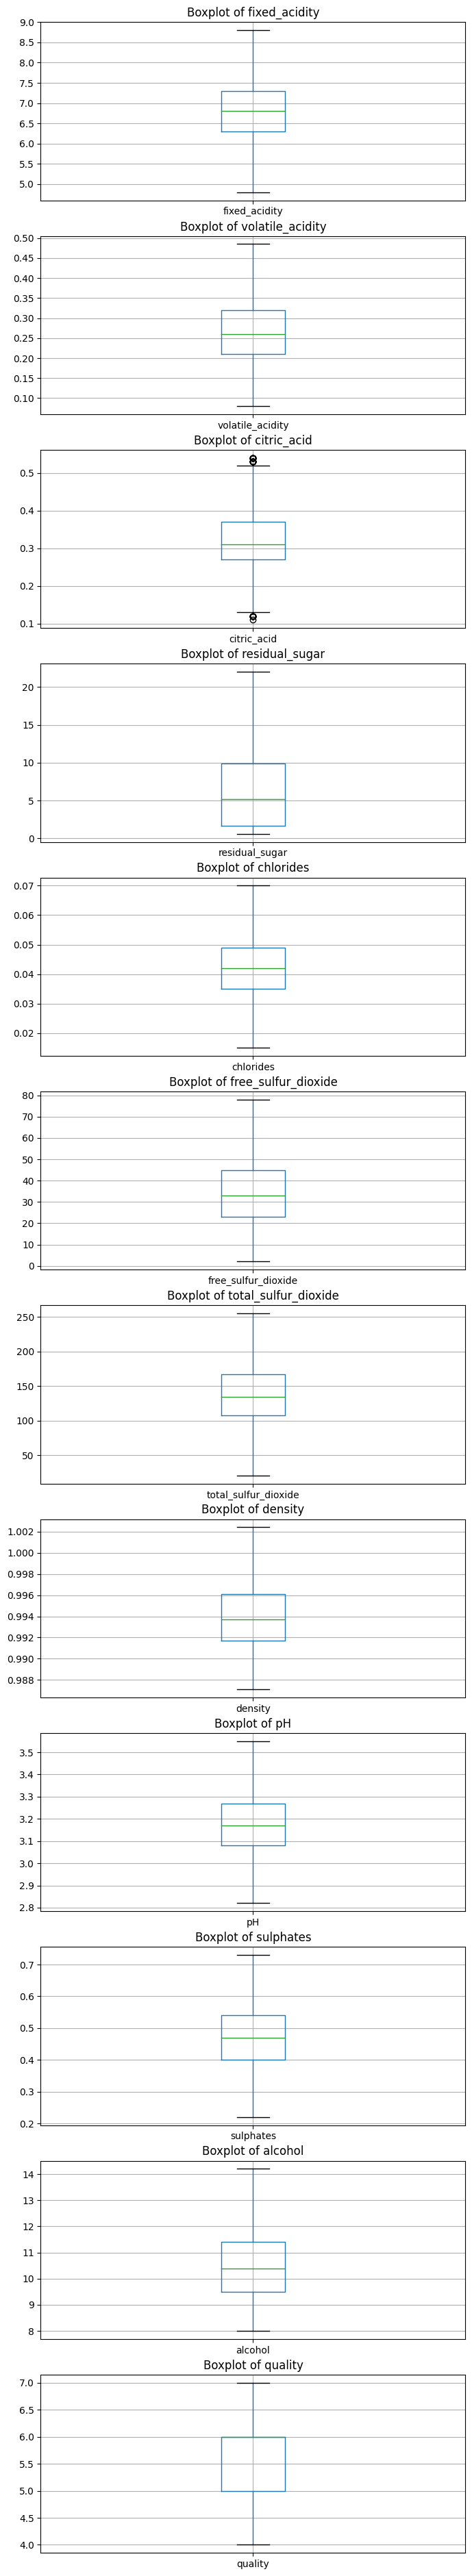

In [54]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

fig, axes = plt.subplots(nrows=len(columns_list), figsize=(8, 4 * len(columns_list)))


for i, column in enumerate(columns_list):
    wine_quality_df[column] = remove_outliers(wine_quality_df[column])
    wine_quality_df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")


We can see that the 1.5 IQR method removed outliers in all of the columns except citric_acid which has really small tails and shoud be okay.

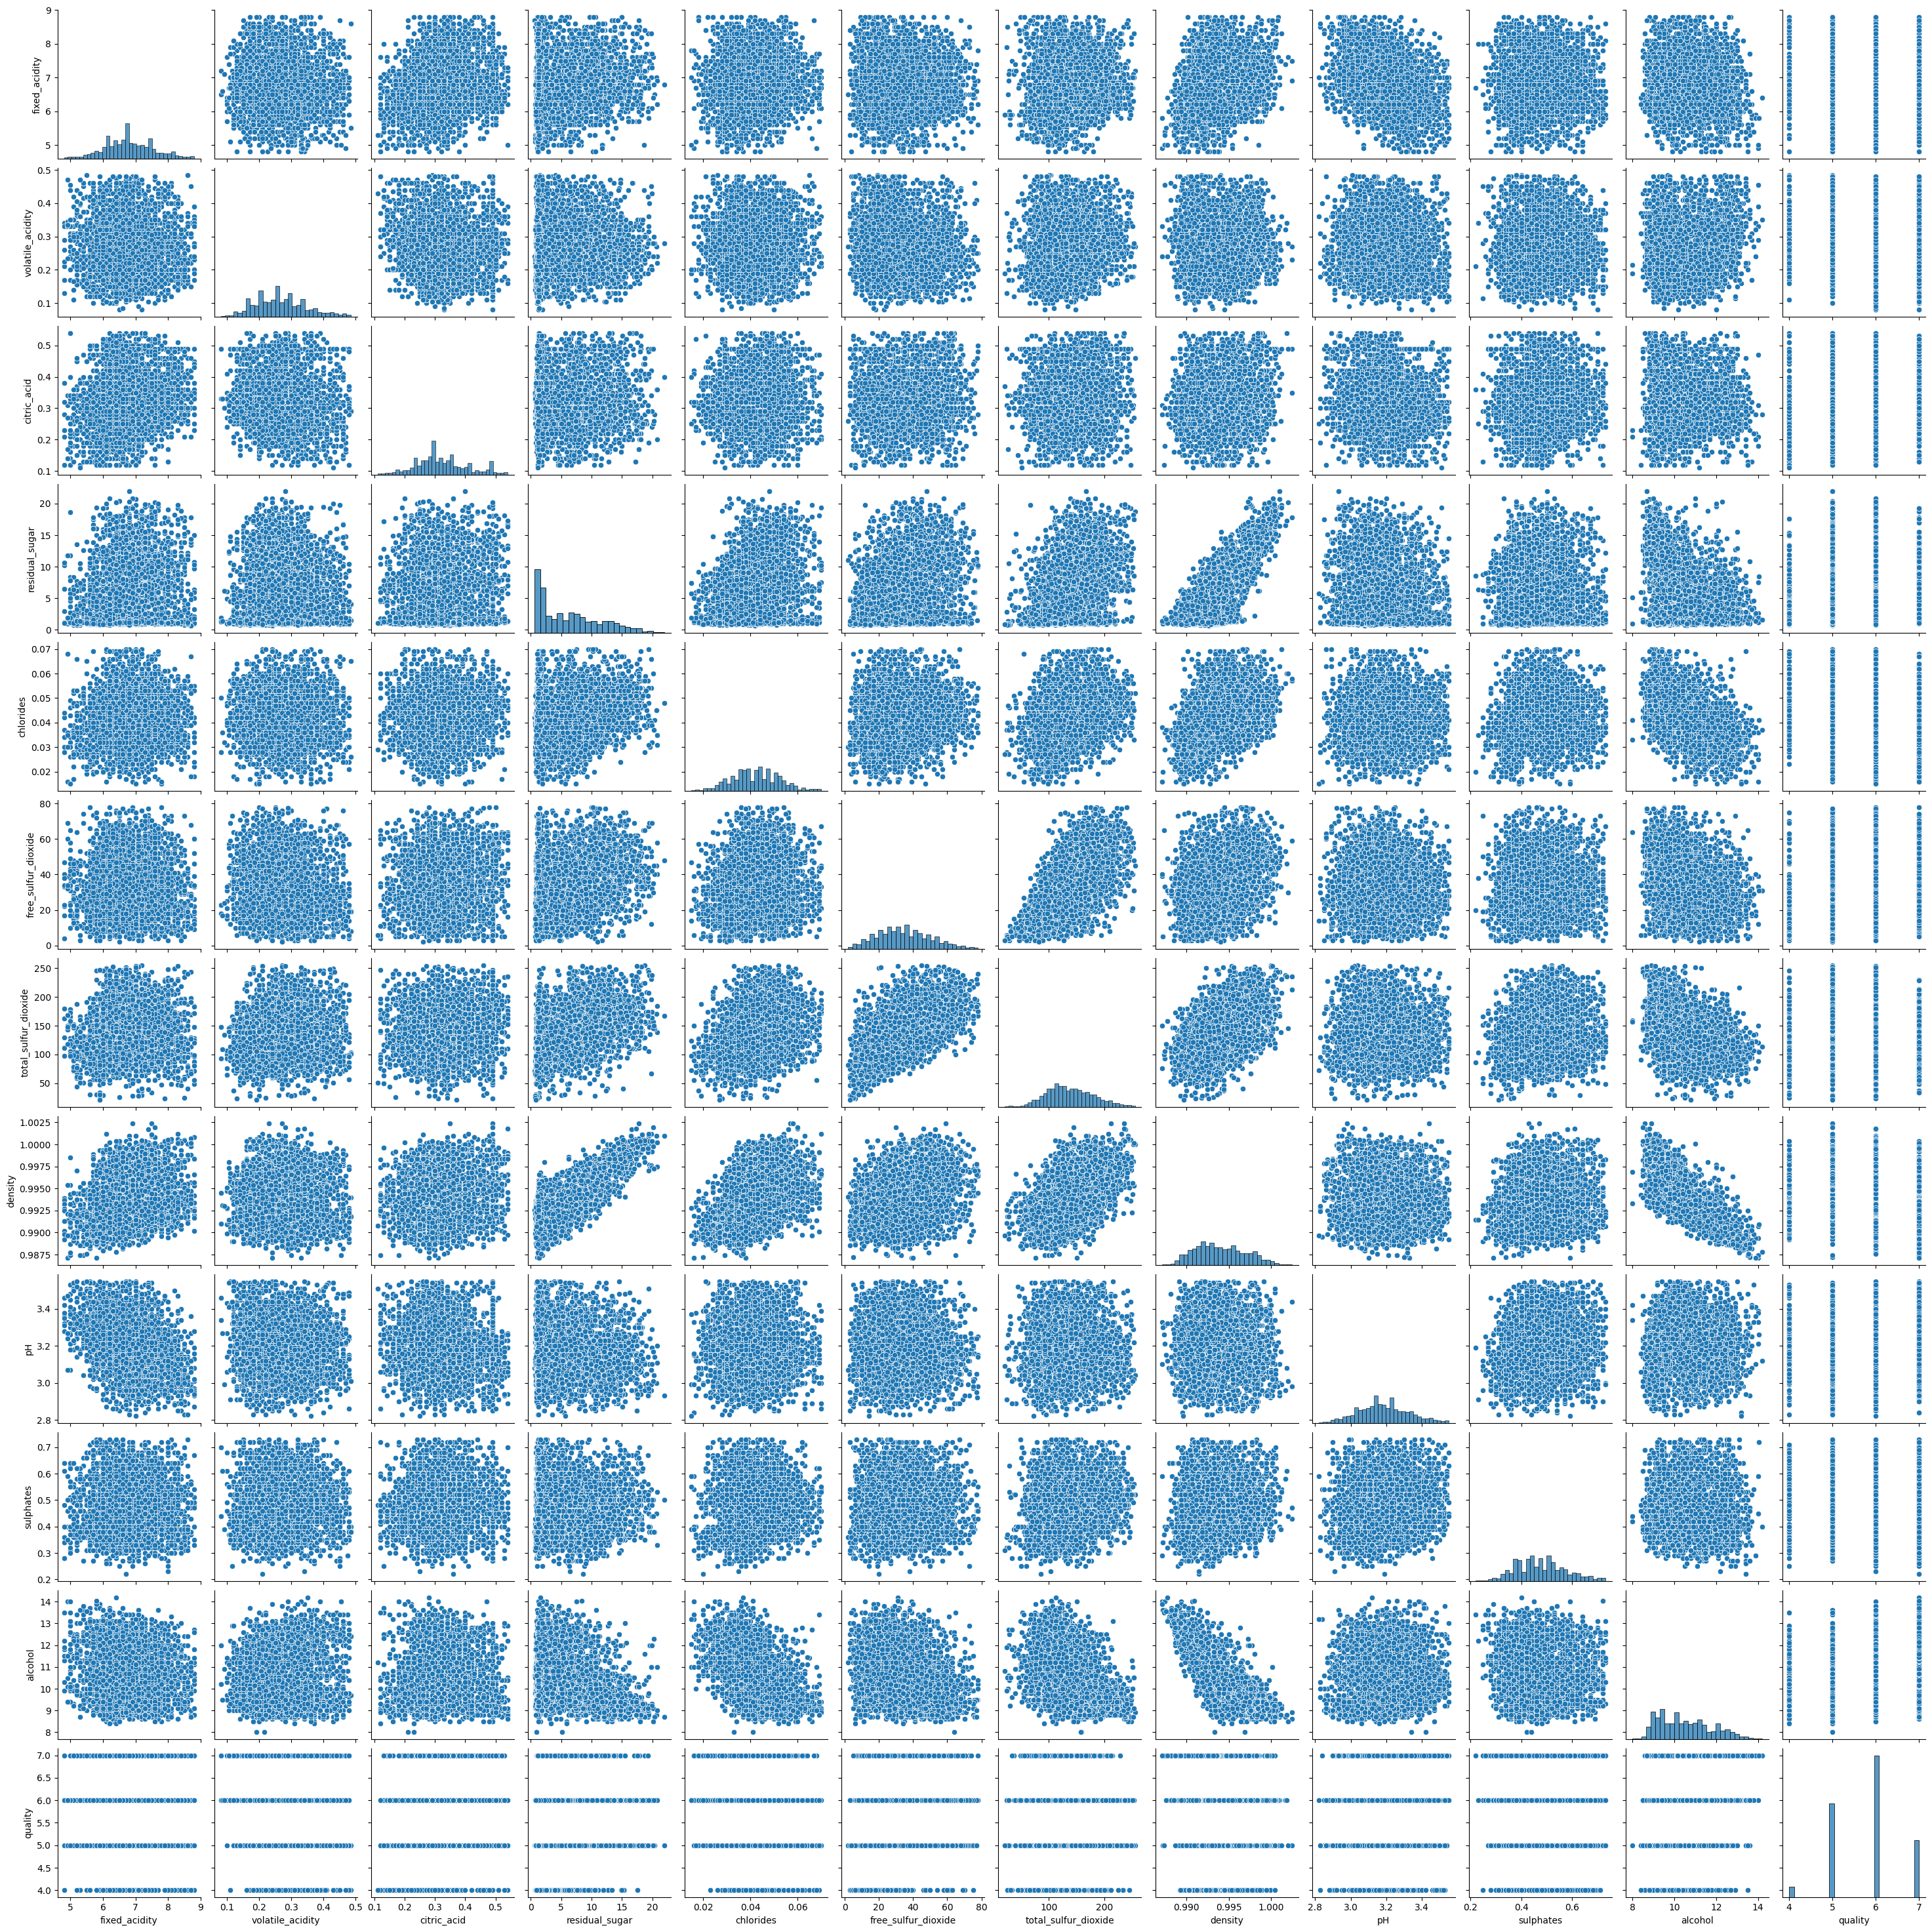

In [55]:
sns.pairplot(wine_quality_df)

1. We can see that residual sugar is positively correlated to density whereas alcohol is negatively correlated to density.
2. Based on our assumption earlier, we fail to see any correlation between pH and acidity columns.